Perona-Maliks equations

In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt 
import  nangs 
import  torch
#import cv2
import io

device = "cuda" if torch.cuda.is_available() else "cpu"

nangs.__version__, torch.__version__

('2021.12.06', '1.11.0+cpu')

In [2]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij') 
grid_x,"a", grid_y

(tensor([[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3]]),
 'a',
 tensor([[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]))

(400, 400)
uint8


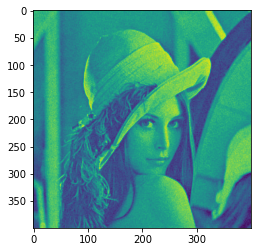

In [3]:
import  matplotlib
image_test = matplotlib.image.imread('D:\\escuela\\WPy64-31040\\hope.jpg')
plt.imshow(image_test)
print(image_test.shape)
print(image_test.dtype)


[[174 168 166 ... 177 173 150]
 [177 170 165 ... 182 163 125]
 [183 175 169 ... 183 167 129]
 ...
 [ 62  62  61 ...  64  67  63]
 [ 49  59  66 ...  71  77  68]
 [ 50  52  66 ...  75  83  68]]
(50, 50)
uint8


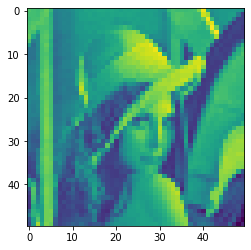

In [4]:
import cv2
img=cv2.imread("D:\\escuela\\WPy64-31040\\hope.jpg", cv2.IMREAD_GRAYSCALE)
print(img)

dim = (50,50)
  
# resize image
initial_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# initial_img = cv2.resize(poisson_noise, dim, interpolation = cv2.INTER_AREA)

#io.imsave("initial_image.jpg", initial_img)
print(initial_img.shape)
print(initial_img.dtype)

plt.imshow(initial_img)

50
229
[[171. 166. 164. ... 136. 134. 128.]
 [167. 166. 165. ... 140. 106.  61.]
 [164. 167. 168. ... 105.  62.  62.]
 ...
 [104. 156. 161. ...  75.  60.  36.]
 [ 76. 137. 174. ...  82.  41.  23.]
 [ 66. 134. 201. ...  51.  22.  43.]]


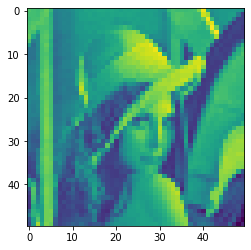

In [5]:
#max
print(len(initial_img))
maxValue = 0
for i in range(len(initial_img)):
    for j in range(len(initial_img[0])):
            if initial_img[i][j]>maxValue:
                maxValue=initial_img[i][j]
print(maxValue,)
little_image=np.zeros_like(initial_img,dtype=float)
if maxValue>=256:
    print("alert 256 exceded")
else:
    for i in range(len(initial_img)):
        for j in range(len(initial_img[0])):
            #print(float(initial_img[i][j]))
            #print(float(initial_img[i][j])/float(256))
            little_image[i][j]=float(initial_img[i][j])
print(little_image)

plt.imshow(little_image)
#print(174/256.)

In [6]:
def mat_dif(a,b):
    result=np.zeros_like(a)
    for i in range(len(initial_img)):
        for j in range(len(initial_img[0])):
            
            print(a[i][j],b[i][j],a[i][j]-b[i][j])
            result[i][j]=a[i][j]-b[i][j]
    #print(result)
    return result

In [7]:
def cart_prod(*args):
    grids =np.meshgrid(*args,indexing='ij')
    return np.stack(grids,axis=-1).reshape(-1,len(args))

In [8]:
b=mat_dif(initial_img,little_image)
b

171 171.0 0.0
166 166.0 0.0
164 164.0 0.0
170 170.0 0.0
180 180.0 0.0
161 161.0 0.0
111 111.0 0.0
115 115.0 0.0
116 116.0 0.0
119 119.0 0.0
124 124.0 0.0
134 134.0 0.0
137 137.0 0.0
143 143.0 0.0
141 141.0 0.0
143 143.0 0.0
146 146.0 0.0
145 145.0 0.0
144 144.0 0.0
145 145.0 0.0
143 143.0 0.0
140 140.0 0.0
143 143.0 0.0
142 142.0 0.0
144 144.0 0.0
143 143.0 0.0
139 139.0 0.0
139 139.0 0.0
139 139.0 0.0
138 138.0 0.0
130 130.0 0.0
128 128.0 0.0
160 160.0 0.0
167 167.0 0.0
164 164.0 0.0
164 164.0 0.0
163 163.0 0.0
165 165.0 0.0
166 166.0 0.0
187 187.0 0.0
224 224.0 0.0
147 147.0 0.0
126 126.0 0.0
131 131.0 0.0
135 135.0 0.0
135 135.0 0.0
135 135.0 0.0
136 136.0 0.0
134 134.0 0.0
128 128.0 0.0
167 167.0 0.0
166 166.0 0.0
165 165.0 0.0
174 174.0 0.0
178 178.0 0.0
153 153.0 0.0
109 109.0 0.0
113 113.0 0.0
117 117.0 0.0
115 115.0 0.0
123 123.0 0.0
132 132.0 0.0
139 139.0 0.0
140 140.0 0.0
143 143.0 0.0
140 140.0 0.0
142 142.0 0.0
143 143.0 0.0
141 141.0 0.0
144 144.0 0.0
142 142.0 0.0
144 14

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Defining equation

In [9]:
from nangs import PDE
import math

K=50

class PeronaMalik(PDE):
    def computePDELoss(self, inputs, outputs):
                
        # compute gradients
        
        # compute first-order derivatives
        grads = self.computeGrads(outputs, inputs)
        dpdx, dpdy, dpdt = grads[:, 0], grads[:, 1], grads[:, 2]
        
        # compute second-order derivatives
        dp2dx2 = self.computeGrads(dpdx, inputs)[:, 0]        
        dp2dy2 = self.computeGrads(dpdy, inputs)[:, 1]
        #dudas
        dp2dpxdpy=self.computeGrads(dpdx, inputs)[:, 1]
        dp2dpydpx=self.computeGrads(dpdy, inputs)[:, 0]
        
        
        # compute loss
        #dpdx, dpdy, dpdt = grads[:, 0], grads[:, 1], grads[:, 2]
        return {'pde': dpdx*(-2/K**2)*torch.exp(-(    torch.pow(dpdx,2)+torch.pow(dpdy,2))/K**2)  *((dpdx*dp2dx2)+(dpdy*dp2dpydpx))
                      -dpdy*(-2/K**2)*torch.exp(-(    torch.pow(dpdx,2)+torch.pow(dpdy,2))/K**2)  *((dpdx*dp2dpxdpy)+(dpdy*dp2dy2))
               +torch.exp(  -(    torch.pow(dpdx,2)+torch.pow(dpdy,2))/K**2) * ( dp2dx2+dp2dy2 )-dpdt}
    
pde = PeronaMalik(inputs=('x', 'y', 't'), outputs='p')

In [10]:
n_samples = 1000
m=0
print("a")

a


In [11]:
# define the sampler

from nangs import RandomSampler

sampler = RandomSampler({
    'x': [0., 50.], 
    'y': [0., 50.],
    't': [0., 50.], 
}, device=device, n_samples=1000)

pde.set_sampler(sampler)
print("a")


a


In [12]:


def initial_condition_Adr(x,y):
    res = torch.zeros(len(x))
    #print(x,y)
    for i in range(len(x)):
        if len(x) == 1:
            #print("suca")
            res[i] = little_image[int(x.item()),int(y.item())]
        else:
            #print(int(x[i]*256),int(y[i]*256))
            res[i]=(little_image [int(x[i]),int(y[i])])
    return res

In [13]:
def cero_f(n_samples):
    return torch.zeros(n_samples)

In [14]:
def f_circle(x,y):
    z = (x - 1)**2 + (y - 1.5)**2
    for i in range(0,len(z)):
        if z[i] <= 1:
            z[i] = 0.5
        else: z[i] = 1

    return z

In [15]:
#from nangs import Dirichlet
#

#left = Dirichlet(
#    RandomSampler({'x': 0., 'y': [0., 200.],'t': [0., 200.] }, device=device, n_samples=n_samples), 
#    lambda inputs: {'p' : cero_f(n_samples)},
#    name="left"
#)

#pde.add_boco(left)
#print("a")

In [16]:
#from nangs import Dirichlet


#right = Dirichlet(
#    RandomSampler({'x': 200., 'y': [0., 200.],'t': [0., 200.]}, device=device, n_samples=n_samples), 
#    lambda inputs: {'p' :  cero_f(n_samples)},
#    name="right"
#)

#pde.add_boco(right)
#print("a") 

In [17]:
#from nangs import Dirichlet
#
#
#up = Dirichlet(
#    RandomSampler({'x': [0.,200.], 'y': 0,'t': [0., 200.]}, device=device, n_samples=n_samples), 
#    lambda inputs: {'p' : cero_f(n_samples)},
#    name="up"
#)

#pde.add_boco(up)
#print("a")

In [18]:
#from nangs import Dirichlet


#down = Dirichlet(
#    RandomSampler({'x': [0.,200.], 'y': 0,'t': [0., 200.]}, device=device, n_samples=n_samples), 
#    lambda inputs: {'p' : cero_f(n_samples)},
#    name="down"
#)

#pde.add_boco(down)
#print("a")

In [19]:
from nangs import Dirichlet


foto = Dirichlet(
    RandomSampler({'x': [0.,50.], 'y': [0., 50.],'t':0}, device=device, n_samples=n_samples), 
     lambda inputs: {'p' :initial_condition_Adr(inputs['x'],inputs['y'])},
    name="foto"
)
# lambda inputs: {'p' : torch.sin(2.*np.pi*inputs['x'])*torch.sin(2.*np.pi*inputs['y'])},

pde.add_boco(foto)
print("a")

a


In [20]:
import torch


class Sine(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.sin(x)


def block(i, o):
    fc = torch.nn.Linear(i, o)
    return torch.nn.Sequential(
        Sine(),
        torch.nn.Linear(i, o)
    )


class MLP(torch.nn.Module):
    def __init__(self, inputs, outputs, layers, neurons):
        super().__init__()
        
        fc_in = torch.nn.Linear(inputs, neurons)
        fc_hidden = [
            block(neurons, neurons)
            for layer in range(layers-1)
        ]
        fc_out = block(neurons, outputs)

        self.mlp = torch.nn.Sequential(
            fc_in,
            *fc_hidden,
            fc_out
        )

    def forward(self, x):
        return self.mlp(x)

In [21]:
# solve

#from nangs import MLP

LR = 1e-2
N_STEPS = 1400
NUM_LAYERS = 3
NUM_HIDDEN = 256
print(len(pde.inputs))
print(len(pde.outputs))

for item in pde.inputs:
    print(item)
for item in pde.outputs:
    print(item)
    
    
mlp = MLP(len(pde.inputs), len(pde.outputs), NUM_LAYERS, NUM_HIDDEN).to(device)
optimizer = torch.optim.Adam(mlp.parameters())
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=LR, pct_start=0.1, div_factor=10, final_div_factor=1, total_steps=N_STEPS)

pde.compile(mlp, optimizer, scheduler)
%time hist = pde.solve(N_STEPS)

3
1
x
y
t
p


{'pde': 16.71818, 'foto': 135.4173}: 100%|█████████████████████████████████████████| 1400/1400 [11:46<00:00,  1.98it/s]

Wall time: 11min 46s


<AxesSubplot:>

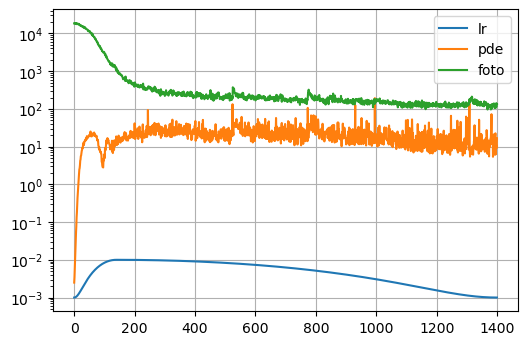

In [22]:
import pandas as pd 

df = pd.DataFrame(hist)
fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
ax.set_yscale('log')
df.plot(ax=ax, grid=True)

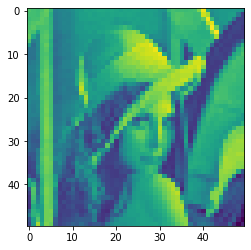

In [23]:
plt.imshow(initial_img)

In [24]:
print(initial_img.shape)
print(initial_img.dtype)

(50, 50)
uint8


In [25]:
print("a")

a


In [26]:
x = np.linspace(0,49,50)
y = np.linspace(0,49,50)

t=0

grid=cart_prod(x,y,t)
xs, ys= grid[:, 0:1], grid[:,1:2]

In [27]:

X = torch.from_numpy(grid).float().to(device)
image_final =  pde.eval(X)

xs, ys= grid[:, 0:1], grid[:,1:2]
print(image_final.shape)
print(image_final.dtype)

#plt.imshow(f_circle(xs,ys).reshape(200,200))

torch.Size([2500, 1])
torch.float32


In [28]:
#x = np.linspace(0,49,50)
# = np.linspace(0,49,50)
#t =0
##Full=np.meshgrid(x, y)

#_x, _y = np.meshgrid(x, y)
#grid = np.stack(np.meshgrid(x, y, t), -1).reshape(-1, 3)
#X = torch.from_numpy(grid).float().to(device)

#image_final =  pde.eval(X)
##print(image_test)
#print(image_final.shape)
#print(image_final.dtype)

##rrrrrplt.imshow(image_final)

torch.Size([50, 50])
torch.float32
tensor([[154.3534, 161.5625, 162.7599,  ..., 136.7785, 137.3067, 139.9264],
        [167.0754, 166.2135, 164.2645,  ..., 140.0029, 135.0241, 113.8590],
        [163.8978, 164.0243, 164.4725,  ..., 138.3880, 107.0203,  66.3303],
        ...,
        [ 89.3397, 127.4676, 157.1239,  ...,  64.3014,  71.0964,  46.7756],
        [ 82.6662, 115.4762, 162.1267,  ...,  68.7637,  67.8270,  35.8177],
        [ 66.2924,  95.8966, 166.7182,  ...,  74.6872,  50.8900,  29.4095]])


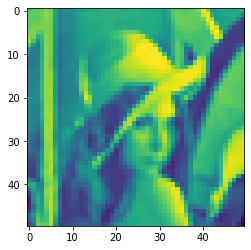

In [29]:
imashow=image_final.reshape(50,50)
print(imashow.shape)
print(imashow.dtype)
print(imashow)
plt.imshow(imashow)

In [30]:
def matrix_substract(a,b):
    res=np.zeros_like(a)
    for i in range(len(a)):
        for j in range(len(a[0])):
            res[i][j]=abs(abs(a[i][j])-abs(b[i][j]))
            
    return res

In [31]:
sub=matrix_substract(initial_img,imashow)
sum=0
for i in range(len(sub)):
        for j in range(len(sub[0])):
            sum+=sub[i][j]
print(   sum/  (  len(sub)*len(sub[0])  )   )

11.5628


In [87]:
##print(len(imashow))
#maxValue = 255
#for i in range(len(initial_img)):
#    for j in range(len(initial_img[0])):
#            if imashow[i][j]>maxValue:
#                print(i,j,256)
#                maxValue=initial_img[i][j]
#print(maxValue)
#big_image=np.zeros_like(initial_img,dtype=float)
#if maxValue>=256:
#    print("alert 256 exceded")
#else:
#    for i in range(len(initial_img)):
#        for j in range(len(initial_img[0])):
#            #print(float(imashow[i][j]),float(imashow[i][j])*float(256/32))
#            #print(float(initial_img[i][j])/float(256))
#            big_image[i][j]=int(float(imashow[i][j]))
#print(big_image)



In [33]:
plt.imshow(big_image)

NameError: name 'big_image' is not defined

In [ ]:
print(big_image)

In [35]:
#for item in pde.bocos:
#    print(item.name)
#    if item.name=="foto":
#        pde.bocos.remove(item)
#        print("borre")
#print("a")

foto
borre
a


In [36]:
#pde.update_boco(foto)

In [37]:
#plt.imshow(imashow)
#for i in imashow:
#    for j in imashow[i]:
#        imashow[i][j]=
#print(imashow)